In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 

## Load the data
From Kaggle and data dictionary is in the link too
https://www.kaggle.com/kemical/kickstarter-projects

In [87]:
df_raw = pd.read_csv('ks-projects-201801.csv')

## Examine the data

In [88]:
df_raw.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


## Use .info() to see length and dtypes

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
#Check to see if there're any missing values in our data set
df_raw.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

No need to drop any NA columns because "name" is categorical and we can use "usd_pledged_real" instead of "usd pledged"

# Feature Engineering
(Feature engineering is the process of creating a variable that characterizes an observation)

To be able to work with the feature "Timestamp", we will transform it to datetime, a format that will allow us to perform calculations on it.

In [89]:
df_raw['launched']=pd.to_datetime(df_raw['launched'])
df_raw['deadline']=pd.to_datetime(df_raw['deadline'])

We are creating a new column 'duration_in_days' which shows the number of days between each progject's deadline and the launched date

In [90]:
df_raw['duration_in_days']=(df_raw['deadline']-df_raw['launched']).dt.days

In [91]:
df_raw['duration_in_days'].head(15)

0     58
1     59
2     44
3     29
4     55
5     34
6     19
7     44
8     34
9     29
10    29
11    29
12    29
13    44
14    27
Name: duration_in_days, dtype: int64

We are createing a new column named percent_pledged by dividing the usd_goal_real column by the usd_pledged_real column. 

This gives us the multiple/factor of the amount pledged over the goal amount, which is the amount asked for.

For example, if the amount pledged is the equal to the goal amount, the percent_pledged would be 100; if the amount pledged is 3 times more than the goal amount, the percent_pledged would be 300.

In [92]:
df_raw['percent_pledged']=(df_raw['usd_pledged_real']/df_raw['usd_goal_real'])*100
df_raw['percent_pledged']

0          0.000000
1          8.070000
2          0.488889
3          0.020000
4          6.579487
            ...    
378656     0.050000
378657    10.333333
378658     0.133333
378659     1.333333
378660    26.200000
Name: percent_pledged, Length: 378661, dtype: float64

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

## Check for duplicates

In [61]:
df_raw.duplicated().sum()

0

## Identify numerical and categorical variables

In [11]:
cols_list=list(df_raw.columns)
cols_list

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real',
 'duration_in_days',
 'percent_pledged']

In [55]:
num_cols=['ID','goal','pledged','backers',
          'usd pledged','usd_pledged_real','usd_goal_real','percent_pledged','duration_in_days']

In [15]:
cat_cols=['name','category',
 'main_category',
 'currency',
 'deadline',
 'launched',
 'state',
 'country']

## Exploring the distrubtions in different columns

In [69]:
df_raw['category'].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [68]:
df_raw['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [71]:
df_raw['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [93]:
df_raw['duration_in_days'].value_counts()

29       169171
59        33623
44        17749
30        13261
34        10099
          ...  
14708         1
14732         1
14749         1
14760         1
14834         1
Name: duration_in_days, Length: 99, dtype: int64

In [94]:
df_raw['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

It's noteworthy that there are 3797 'N,0"' values in the country column which are potentially Nan/null values

In [67]:
df_raw['country'].value_counts(normalize=True) * 100

US      77.279414
GB       8.892387
CA       3.896889
AU       2.070189
DE       1.101513
N,0"     1.002744
FR       0.776156
IT       0.760047
NL       0.757406
ES       0.601065
SE       0.464003
MX       0.462683
NZ       0.382136
DK       0.293930
IE       0.214176
CH       0.200971
NO       0.186975
HK       0.163207
BE       0.162943
AT       0.157661
SG       0.146569
LU       0.016373
JP       0.010564
Name: country, dtype: float64

# Since the majority (77%) of the data points were from the US. 

# For simplicity and consistency, we are going to focus on the US data points and store in a data frame called df_us

## Remain useful columns in a single df which will be used for further analysis

In [95]:
df_us=df_raw[df_raw['country']=='US'] #focus on data from the US only

In [96]:
df_us=df_us.drop(['ID','goal','pledged','usd pledged'],axis=1)

'ID' is the unique identifier but does not contribute to statistical analysis
For consistency, usd_goal_real' and 'usd_pledged_real' will be used instead of 'goal', or 'pledged' or 'use pledged' because these 2 columns do not contain any null values

In [14]:
df_us.head(5)

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.0,59,8.070000
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.0,44,0.488889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.0,29,0.020000
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.0,55,6.579487
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.0,34,104.750000


In [97]:
df_us_copy=df_us.copy() #making a copy for backup

In [16]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292627 entries, 1 to 378660
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              292624 non-null  object        
 1   category          292627 non-null  object        
 2   main_category     292627 non-null  object        
 3   currency          292627 non-null  object        
 4   deadline          292627 non-null  datetime64[ns]
 5   launched          292627 non-null  datetime64[ns]
 6   state             292627 non-null  object        
 7   backers           292627 non-null  int64         
 8   country           292627 non-null  object        
 9   usd_pledged_real  292627 non-null  float64       
 10  usd_goal_real     292627 non-null  float64       
 11  duration_in_days  292627 non-null  int64         
 12  percent_pledged   292627 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memor

In [69]:
df_us.isnull().any()

name                 True
category            False
main_category       False
currency            False
deadline            False
launched            False
state               False
backers             False
country             False
usd_pledged_real    False
usd_goal_real       False
duration_in_days    False
percent_pledged     False
dtype: bool

## Summarize numberical and categorical variables separately

In [10]:
df_us.describe(include=[np.number])

,backers,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged
count,292627.000000,2.926270e+05,2.926270e+05,292627.000000,2.926270e+05
mean,113.078615,9.670193e+03,4.403497e+04,33.740954,3.772658e+02
std,985.723400,9.932942e+04,1.108372e+06,68.025055,3.013829e+04
min,0.000000,0.000000e+00,1.000000e-02,0.000000,0.000000e+00
25%,2.000000,4.100000e+01,2.000000e+03,29.000000,6.000000e-01
50%,14.000000,7.250000e+02,5.250000e+03,29.000000,1.578000e+01
75%,60.000000,4.370000e+03,1.500000e+04,37.000000,1.074000e+02
max,219382.000000,2.033899e+07,1.000000e+08,14866.000000,1.042779e+07


In [11]:
df_us.describe(include=['O']) #The 'O' stands for objects

,name,category,main_category,currency,state,country
count,292624,292627,292627,292627,292627,292627
unique,290800,159,15,1,5,1
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,13,16222,51922,292627,152061,292627


## Revisiting the distrubtions in different columns

In [108]:
df_us['category'].value_counts()

Product Design     16222
Documentary        13671
Music              11595
Tabletop Games     10691
Shorts             10348
                   ...  
Residencies           43
Letterpress           34
Chiptune              23
Literary Spaces       19
Taxidermy              8
Name: category, Length: 159, dtype: int64

In [110]:
df_us['main_category'].value_counts()

Film & Video    51922
Music           43238
Publishing      31726
Games           24636
Art             22311
Design          21690
Technology      21556
Food            19941
Fashion         16584
Comics           8910
Theater          8709
Photography      7988
Crafts           6648
Journalism       3540
Dance            3228
Name: main_category, dtype: int64

In [112]:
df_us['state'].value_counts()

failed        152061
successful    109299
canceled       28311
live            1740
suspended       1216
Name: state, dtype: int64

In [113]:
df_us['country'].value_counts()

US    292627
Name: country, dtype: int64

In [98]:
df_us['duration_in_days'].value_counts()

29       128289
59        25520
44        14587
30        10753
34         7657
          ...  
14708         1
14732         1
14749         1
14760         1
14834         1
Name: duration_in_days, Length: 98, dtype: int64

## Exploratory Data Analysis

In [117]:
df_us.shape

(292627, 13)

In [72]:
df_us.groupby('main_category').mean()

,backers,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged
main_category,,,,,
Art,43.028999,3306.613835,32925.693900,32.519923,284.482705
Comics,141.334119,7072.704378,22111.481514,33.252413,736.199278
Crafts,29.869886,1720.494546,10689.841682,30.326865,299.849722
Dance,45.671314,3695.297280,9345.089622,32.085812,83.767937
Design,269.816598,26732.962466,44079.063067,34.377317,215.730583
Fashion,67.794561,6079.896657,22524.952777,31.956585,111.301232
Film & Video,70.861658,6659.951323,80393.303565,35.368514,171.904246
Food,59.306504,5648.474497,36526.483657,33.071310,94.050394
Games,375.685988,24947.336634,49400.623648,31.709693,926.028269


In [119]:
df_us.groupby('category').mean()

,backers,usd_pledged_real,usd_goal_real,percent_pledged
category,,,,
3D Printing,299.968059,88990.022408,49346.154791,211.271320
Academic,44.276699,3162.870065,70089.813916,190.749184
Accessories,90.644433,6827.443912,14928.683049,119.314139
Action,58.080979,4231.197740,240611.815443,55.574830
Animals,40.962025,2187.025886,12256.075949,68.042201
...,...,...,...,...
Woodworking,20.609493,1613.554466,11352.288026,303.126607
Workshops,21.983333,1655.653667,10668.041667,45.641617
World Music,58.402143,4592.354828,33704.216300,68.111375


In [124]:
df_us.groupby('state').mean()

,backers,usd_pledged_real,usd_goal_real,percent_pledged
state,,,,
canceled,25.820670,2317.801194,76293.964894,103.073911
failed,16.772118,1331.173917,60664.242108,9.247504
live,77.495402,6352.720575,84039.947701,395.825101
successful,270.177952,23212.887104,9695.670955,962.726786
suspended,117.960526,11119.731497,242796.605263,131.603517


# Correlation Matrix
Correlation tells us how strong the relationship is

,backers,usd_pledged_real,usd_goal_real,percent_pledged
backers,1.000000,0.754823,0.005271,0.016782
usd_pledged_real,0.754823,1.000000,0.006060,0.008661
usd_goal_real,0.005271,0.006060,1.000000,-0.000468
percent_pledged,0.016782,0.008661,-0.000468,1.000000


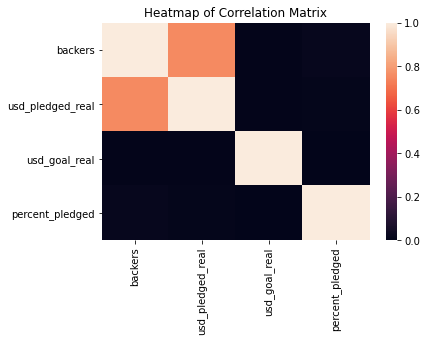

In [126]:
#What features correlate the most with success or other features? 
corr=df_us.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

## There is a high correlation between the number of backers and the amount pledged 

# (Find the p-value)

In [83]:
import scipy as sc
from scipy import stats
pearson_coef,p_value=stats.pearsonr(df_us.backers,df_us.usd_pledged_real)
pearson_coef

0.7548234979124591

In [87]:
p_value

0.0

Adding a new column launched_year which is the year that a project was launched

In [99]:
df_us['launched_year']=df_us['launched'].dt.year

In [100]:
df_us['launched_year']

1         2017
2         2013
3         2012
4         2015
5         2016
          ... 
378656    2014
378657    2011
378658    2010
378659    2016
378660    2011
Name: launched_year, Length: 292627, dtype: int64

In [138]:
df_us.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged,launched_year
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.0,59,8.070000,2017
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.0,44,0.488889,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.0,29,0.020000,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.0,55,6.579487,2015
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.0,34,104.750000,2016


In [101]:
num_projects_launched_per_year=\
df_us.groupby('launched_year')['launched'].count()
num_projects_launched_per_year

launched_year
1970        6
2009     1329
2010    10519
2011    26237
2012    40547
2013    38687
2014    50769
2015    53543
2016    38030
2017    32878
2018       82
Name: launched, dtype: int64

<AxesSubplot:xlabel='launched_year'>

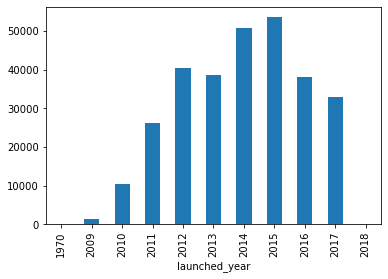

In [102]:
num_projects_launched_per_year.plot(kind='bar')

In [23]:
df_us[df_us['launched_year']==2009].sort_values('launched').head(20)
#full-year data from the year of 2009-2017

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged,launched_year
169268,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,2009-04-21 21:02:48,failed,30,US,625.00,1000.0,39,62.500000,2009
322000,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,2009-04-23 00:07:53,failed,3,US,22.00,80000.0,87,0.027500,2009
138572,drawing for dollars,Illustration,Art,USD,2009-05-03,2009-04-24 21:52:03,successful,3,US,35.00,20.0,8,175.000000,2009
325391,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,2009-04-25 17:36:21,successful,25,US,145.00,99.0,79,146.464646,2009
122662,Pantshirts,Fashion,Fashion,USD,2009-05-26,2009-04-27 14:10:39,failed,10,US,387.00,1900.0,28,20.368421,2009
213711,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,2009-04-28 13:55:41,successful,110,US,3329.00,3000.0,17,110.966667,2009
345606,Web Site for Short Horror Film,Shorts,Film & Video,USD,2009-05-29,2009-04-29 02:04:21,failed,3,US,41.00,200.0,29,20.500000,2009
235255,Help me write my second novel.,Fiction,Publishing,USD,2009-05-29,2009-04-29 02:58:50,successful,18,US,563.00,500.0,29,112.600000,2009
98954,Produce a Play (Canceled),Theater,Theater,USD,2009-06-01,2009-04-29 04:37:37,canceled,0,US,0.00,500.0,32,0.000000,2009
342226,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,2009-04-29 05:26:32,failed,2,US,15.00,300.0,16,5.000000,2009


In [ ]:
#takes a long time
df_us['duration_in_days'].plot(kind='bar')

## EDA 1

In [127]:
#%growth previous year

# EDA2

<AxesSubplot:ylabel='main_category'>

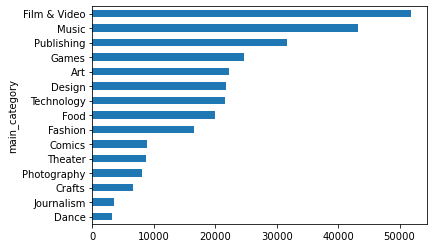

In [48]:
df_main_cat = df_us.groupby('main_category')['launched'].count()
# df_main_cat.plot(kind='bar')
df_main_cat.sort_values().plot(kind='barh')

<AxesSubplot:ylabel='main_category'>

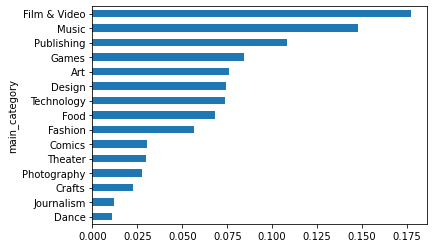

In [51]:
df_main_cat = (df_us.groupby('main_category')['launched'].count())/292627
#percentage
# df_main_cat.plot(kind='bar')
df_main_cat.sort_values().plot(kind='barh')

In [ ]:
#df['column name'] = df['column name'].replace(['old value'],'new value')

# EDA3

In [110]:
df_success=df_us.copy()

In [111]:
df_success.state=df_success.state.replace(['successful'],True)
df_success.state

1           failed
2           failed
3           failed
4         canceled
5             True
            ...   
378656    canceled
378657      failed
378658      failed
378659      failed
378660      failed
Name: state, Length: 292627, dtype: object

In [112]:
df_us.state.value_counts()

failed        152061
successful    109299
canceled       28311
live            1740
suspended       1216
Name: state, dtype: int64

In [114]:
df_success.state.value_counts()

failed       152061
True         109299
canceled      28311
live           1740
suspended      1216
Name: state, dtype: int64

In [115]:
df_success.state=df_success.state.replace(['failed'],False)
df_success.state=df_success.state.replace(['canceled'],False)
df_success.state=df_success.state.replace(['live'],False)
df_success.state=df_success.state.replace(['suspended'],False)

In [117]:
df_success.state.value_counts()

False    183328
True     109299
Name: state, dtype: int64

In [129]:
df_success.groupby('main_category').state.mean()

main_category
Art             0.425620
Comics          0.540965
Crafts          0.246691
Dance           0.646840
Design          0.354126
Fashion         0.248432
Film & Video    0.380995
Food            0.268291
Games           0.379769
Journalism      0.225424
Music           0.502290
Photography     0.318102
Publishing      0.314096
Technology      0.219104
Theater         0.599495
Name: state, dtype: float64

<AxesSubplot:ylabel='main_category'>

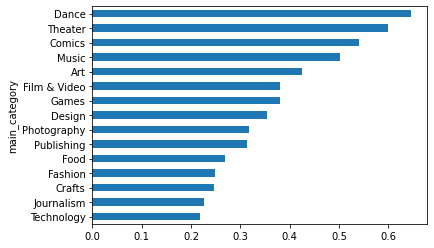

In [130]:
df_success.groupby('main_category').state.mean().sort_values().plot(kind='barh')

In [131]:
df_success_minus_fail=df_success.groupby('main_category').state.mean()-df_fail.groupby('main_category').state.mean()

In [133]:
df_success_minus_fail.sort_values(ascending=False)

main_category
Dance           0.339219
Theater         0.258124
Comics          0.166218
Music           0.074263
Games          -0.061577
Art            -0.065304
Film & Video   -0.141924
Design         -0.143983
Photography    -0.268778
Publishing     -0.275704
Food           -0.367735
Fashion        -0.379643
Technology     -0.399518
Crafts         -0.403580
Journalism     -0.427401
Name: state, dtype: float64

# EDA 3.2-Failure table only

In [120]:
df_fail=df_us.copy()

In [121]:
df_fail.state.value_counts()

failed        152061
successful    109299
canceled       28311
live            1740
suspended       1216
Name: state, dtype: int64

In [122]:
df_fail.state=df_fail.state.replace(['failed'],True)
df_fail.state

1               True
2               True
3               True
4           canceled
5         successful
             ...    
378656      canceled
378657          True
378658          True
378659          True
378660          True
Name: state, Length: 292627, dtype: object

In [123]:
df_fail.state.value_counts()

True          152061
successful    109299
canceled       28311
live            1740
suspended       1216
Name: state, dtype: int64

In [124]:
df_fail.state=df_fail.state.replace(['successful'],False)
df_fail.state=df_fail.state.replace(['canceled'],False)
df_fail.state=df_fail.state.replace(['live'],False)
df_fail.state=df_fail.state.replace(['suspended'],False)

In [125]:
df_fail.state.value_counts()

True     152061
False    140566
Name: state, dtype: int64

In [127]:
df_us.state.value_counts() 
#check if the number of 'successful' in df_success and 
# the number of 'failed' in df_fail are the same as those in df_us

failed        152061
successful    109299
canceled       28311
live            1740
suspended       1216
Name: state, dtype: int64

In [134]:
df_fail.groupby('main_category').state.mean().sort_values()

main_category
Dance           0.307621
Theater         0.341371
Comics          0.374747
Music           0.428026
Games           0.441346
Art             0.490924
Design          0.498110
Film & Video    0.522919
Photography     0.586880
Publishing      0.589800
Technology      0.618621
Fashion         0.628075
Food            0.636026
Crafts          0.650271
Journalism      0.652825
Name: state, dtype: float64

In [129]:
df_success.groupby('main_category').state.mean()

main_category
Art             0.425620
Comics          0.540965
Crafts          0.246691
Dance           0.646840
Design          0.354126
Fashion         0.248432
Film & Video    0.380995
Food            0.268291
Games           0.379769
Journalism      0.225424
Music           0.502290
Photography     0.318102
Publishing      0.314096
Technology      0.219104
Theater         0.599495
Name: state, dtype: float64

<AxesSubplot:ylabel='main_category'>

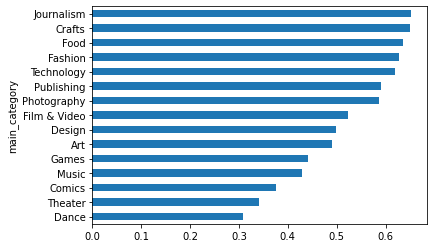

In [128]:
df_fail.groupby('main_category').state.mean().sort_values().plot(kind='barh')

# make some graphs, success % per main cat, fail % per main

In [69]:
df_corr=df_us[['backers','usd_pledged_real']]
df_corr

,backers,usd_pledged_real
1,15,2421.0
2,3,220.0
3,1,1.0
4,14,1283.0
5,224,52375.0
...,...,...
378656,1,25.0
378657,5,155.0
378658,1,20.0
378659,6,200.0


In [71]:
df_corr.sort_values('usd_pledged_real',ascending=False).head(10)

,backers,usd_pledged_real
157270,78471,20338986.27
250254,62642,13285226.36
216629,66673,12779843.49
289915,19264,12393139.69
282416,68929,10266845.74
293861,44949,9192055.66
187652,219382,8782571.99
6665,63416,8596474.58
309630,43733,7072757.00
271276,26359,6565782.50


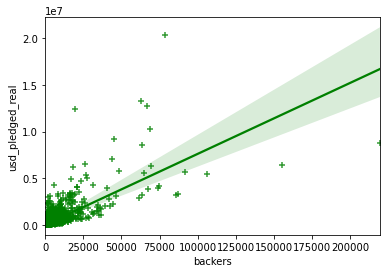

In [63]:
import seaborn as sns
axx=sns.regplot(x='backers',y='usd_pledged_real',data=df_us,color='green',marker='+')

(0.0, 10000000.0)

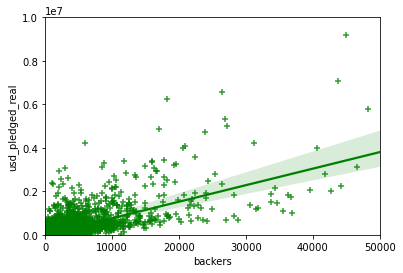

In [76]:
axx2=sns.regplot(x='backers',y='usd_pledged_real',data=df_us,color='green',marker='+')
plt.xlim(0,50000)
plt.ylim(0,10000000)

(0.0, 4000000.0)

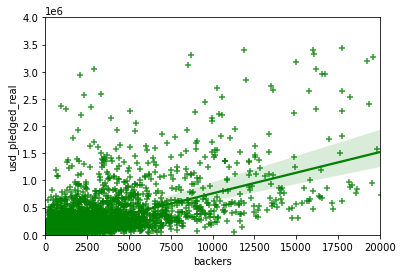

In [78]:
axx3=sns.regplot(x='backers',y='usd_pledged_real',data=df_us,color='green',marker='+')
plt.xlim(0,20000)
plt.ylim(0,4000000)

# EDA4

Average Funding raised per category (successful projects only)
# Need to turn on the 'state' column==True

In [144]:
df_success.state.value_counts()

False    183328
True     109299
Name: state, dtype: int64

In [162]:
df_success[df_success['state']==True]

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,True,224,US,52375.00,50000.0,34,104.750000
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01 18:30:44,True,16,US,1205.00,1000.0,19,120.500000
11,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09 06:42:58,True,100,US,12700.00,12500.0,29,101.600000
18,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,2012-08-02 14:11:32,True,7,US,250.00,250.0,14,100.000000
20,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,2013-11-25 07:06:11,True,624,US,34268.00,20000.0,34,171.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378631,MONSTROCARDS- A Creative Drawing Game of Horri...,Playing Cards,Games,USD,2014-10-03,2014-09-03 19:53:50,True,413,US,13861.50,10000.0,29,138.615000
378637,Ways to Look at the Moon,Shorts,Film & Video,USD,2017-10-13,2017-08-29 06:57:28,True,123,US,10245.00,10000.0,44,102.450000
378639,Superette Tea - Boldly Caffeinated Loose Leaf Tea,Drinks,Food,USD,2015-12-03,2015-11-03 13:04:14,True,103,US,5579.00,5000.0,29,111.580000
378644,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,2015-11-23 07:33:14,True,120,US,6169.00,3500.0,21,176.257143


In [163]:
df_success[df_success['state']==True].state.value_counts()

True    109299
Name: state, dtype: int64

In [161]:
df_success[df_success['state']==True].groupby('main_category').usd_pledged_real.mean().sort_values(ascending=False)

main_category
Technology      104317.680129
Design           68928.169091
Games            60753.195484
Fashion          21631.635915
Food             17847.168305
Film & Video     14865.630768
Comics           12193.533041
Journalism       10390.669712
Photography       9979.337033
Publishing        9333.075867
Music             7481.140029
Art               6919.099444
Theater           6422.144200
Crafts            5850.091774
Dance             5365.263123
Name: usd_pledged_real, dtype: float64

EDA 5

<AxesSubplot:>

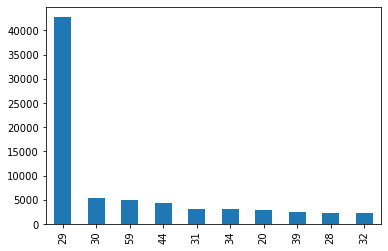

In [167]:
df_success[df_success['state']==True].duration_in_days.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

# EDA 6

In [170]:
df_success.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,False,15,US,2421.0,30000.0,59,8.070000
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,False,3,US,220.0,45000.0,44,0.488889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,False,1,US,1.0,5000.0,29,0.020000
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,False,14,US,1283.0,19500.0,55,6.579487
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,True,224,US,52375.0,50000.0,34,104.750000


In [171]:
df_success.groupby('main_category').state.mean()

main_category
Art             0.425620
Comics          0.540965
Crafts          0.246691
Dance           0.646840
Design          0.354126
Fashion         0.248432
Film & Video    0.380995
Food            0.268291
Games           0.379769
Journalism      0.225424
Music           0.502290
Photography     0.318102
Publishing      0.314096
Technology      0.219104
Theater         0.599495
Name: state, dtype: float64

In [ ]:
#If you have time left, look at the corr with the newly created variables
#(e.g. backers and success rate)

In [175]:
df_success[df_success['state']==True]

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration_in_days,percent_pledged
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,True,224,US,52375.00,50000.0,34,104.750000
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01 18:30:44,True,16,US,1205.00,1000.0,19,120.500000
11,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09 06:42:58,True,100,US,12700.00,12500.0,29,101.600000
18,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,2012-08-02 14:11:32,True,7,US,250.00,250.0,14,100.000000
20,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,2013-11-25 07:06:11,True,624,US,34268.00,20000.0,34,171.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378631,MONSTROCARDS- A Creative Drawing Game of Horri...,Playing Cards,Games,USD,2014-10-03,2014-09-03 19:53:50,True,413,US,13861.50,10000.0,29,138.615000
378637,Ways to Look at the Moon,Shorts,Film & Video,USD,2017-10-13,2017-08-29 06:57:28,True,123,US,10245.00,10000.0,44,102.450000
378639,Superette Tea - Boldly Caffeinated Loose Leaf Tea,Drinks,Food,USD,2015-12-03,2015-11-03 13:04:14,True,103,US,5579.00,5000.0,29,111.580000
378644,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,2015-11-23 07:33:14,True,120,US,6169.00,3500.0,21,176.257143


In [197]:
success_rate=df_success.groupby('main_category').state.mean()
success_rate

main_category
Art             0.425620
Comics          0.540965
Crafts          0.246691
Dance           0.646840
Design          0.354126
Fashion         0.248432
Film & Video    0.380995
Food            0.268291
Games           0.379769
Journalism      0.225424
Music           0.502290
Photography     0.318102
Publishing      0.314096
Technology      0.219104
Theater         0.599495
Name: state, dtype: float64

In [201]:
backers_count_success=df_success[df_success['state']==True].groupby('main_category').backers.count()
backers_count_success

main_category
Art              9496
Comics           4820
Crafts           1640
Dance            2088
Design           7681
Fashion          4120
Film & Video    19782
Food             5350
Games            9356
Journalism        798
Music           21718
Photography      2541
Publishing       9965
Technology       4723
Theater          5221
Name: backers, dtype: int64

In [206]:
import scipy as sc
from scipy import stats
pearson_coef2,p_value=stats.pearsonr(success_rate.values,backers_count_success.values)
pearson_coef2

0.2125956330430817